In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [7]:
df = pd.read_csv('E:\\singapore\\data\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [10]:
df.describe(include='all')

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,77895,77895,77895,77895,77895,77895,77895.000000,77895,77895.000000,77895,7.789500e+04
unique,44,26,7,2439,548,17,NaN,20,NaN,622,NaN
top,2018-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 11 months,NaN
freq,2539,6168,32233,268,1203,18102,NaN,25453,NaN,601,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.612341,NaN,1994.039155,NaN,4.386677e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.295162,NaN,12.783561,NaN,1.532126e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1984.000000,NaN,3.300000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,1994.000000,NaN,4.080000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2003.000000,NaN,5.130000e+05


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                77895 non-null  object 
 1   town                 77895 non-null  object 
 2   flat_type            77895 non-null  object 
 3   block                77895 non-null  object 
 4   street_name          77895 non-null  object 
 5   storey_range         77895 non-null  object 
 6   floor_area_sqm       77895 non-null  float64
 7   flat_model           77895 non-null  object 
 8   lease_commence_date  77895 non-null  int64  
 9   remaining_lease      77895 non-null  object 
 10  resale_price         77895 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.5+ MB


In [26]:
unique_values_in_columns = {}

# Columns to exclude
columns_to_exclude = ["month", "resale_price", "floor_area_sqm",'block','lease_commence_date','storey_range', 'remaining_lease']

for column in df.columns:
    if column not in columns_to_exclude:
        unique_values_in_columns[column] = df[column].unique()

# Display unique values for each column
for column, values in unique_values_in_columns.items():
    print(f"Unique values in '{column}':")
    print('\n')
    for value in values:
        print(value, end=' ')

# Alternatively, you can use value_counts to see unique values and their counts
for column in df.columns:
    if column not in columns_to_exclude:
        print(f"Value counts for '{column}':")
        print(df[column].value_counts())

Unique values in 'town':


ANG MO KIO BEDOK BISHAN BUKIT BATOK BUKIT MERAH BUKIT PANJANG BUKIT TIMAH CENTRAL AREA CHOA CHU KANG CLEMENTI GEYLANG HOUGANG JURONG EAST JURONG WEST KALLANG/WHAMPOA MARINE PARADE PASIR RIS PUNGGOL QUEENSTOWN SEMBAWANG SENGKANG SERANGOON TAMPINES TOA PAYOH WOODLANDS YISHUN Unique values in 'flat_type':


2 ROOM 3 ROOM 4 ROOM 5 ROOM EXECUTIVE 1 ROOM MULTI-GENERATION Unique values in 'street_name':


ANG MO KIO AVE 10 ANG MO KIO AVE 4 ANG MO KIO AVE 5 ANG MO KIO AVE 1 ANG MO KIO AVE 3 ANG MO KIO AVE 9 ANG MO KIO AVE 8 ANG MO KIO AVE 6 ANG MO KIO ST 52 BEDOK NTH AVE 4 BEDOK NTH AVE 1 BEDOK NTH RD BEDOK STH AVE 1 BEDOK RESERVOIR RD CHAI CHEE ST BEDOK NTH ST 3 BEDOK STH RD CHAI CHEE AVE NEW UPP CHANGI RD CHAI CHEE DR BEDOK STH AVE 2 BEDOK NTH AVE 3 BEDOK RESERVOIR VIEW CHAI CHEE RD LENGKONG TIGA BEDOK CTRL JLN DAMAI BEDOK NTH AVE 2 BEDOK STH AVE 3 SIN MING RD SIN MING AVE BISHAN ST 12 BISHAN ST 13 BISHAN ST 22 BISHAN ST 24 BISHAN ST 23 BRIGHT HILL DR SHUNFU RD BT 

In [8]:
# create price per sqm
df['resale_pricePersqm'] =  df['resale_price'] / df['floor_area_sqm']
summary = df['resale_pricePersqm'].describe()
print(summary)

count    77895.000000
mean      4525.005871
std       1209.275380
min       2089.552239
25%       3729.508197
50%       4226.415094
75%       4925.373134
max      12762.236559
Name: resale_pricePersqm, dtype: float64


In [9]:
df_copy = df.copy()

In [10]:
df_copy[['remaining_lease', 'years', 'month1', 'month2']] = df_copy['remaining_lease'].str.split(' ', expand=True)


In [30]:
df_copy.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_pricePersqm,years,month1,month2
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,years,04,months
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,years,07,months
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,years,05,months


In [11]:
# Convert 'remaining_lease' and 'month1' to numeric
df_copy['remaining_lease'] = pd.to_numeric(df_copy['remaining_lease'])
df_copy['month1'] = pd.to_numeric(df_copy['month1'])

# Replace NA values in 'month1' with 0
df_copy['month1'].fillna(0, inplace=True)

# Divide 'month1' by the number of months in a year (12)
df_copy['month1'] = df_copy['month1'] / 12

# Combine 'remaining_lease' and 'month1' to get the final 'remaining_lease' column
df_copy['remaining_lease'] = df_copy['remaining_lease'] + df_copy['month1']

df_copy = df_copy.drop(['years', 'month1', 'month2'], axis=1)

# Display the first few rows of the 'remaining_lease' column
df_copy['remaining_lease'].head()

0    61.333333
1    60.583333
2    62.416667
3    62.083333
4    62.416667
Name: remaining_lease, dtype: float64

FEATURE VISUALIZATION

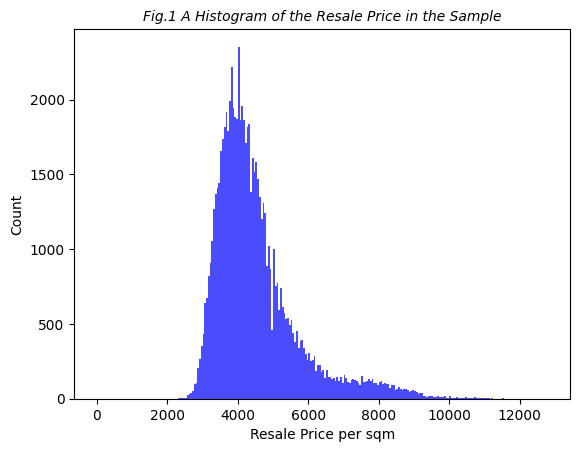

In [12]:
# Filter out rows with NA values in 'resale_pricePersqm'
df_filtered = df_copy.dropna(subset=['resale_pricePersqm'])

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(df_filtered['resale_pricePersqm'], bins=range(0, int(df_filtered['resale_pricePersqm'].max()) + 51, 50), color='blue', alpha=0.7)

# Customize the title and axis labels
ax.set_title('Fig.1 A Histogram of the Resale Price in the Sample', fontsize=10, style='italic')
ax.set_xlabel('Resale Price per sqm')
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [42]:
df_copy.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_pricePersqm
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61.333333,232000.0,5272.727273


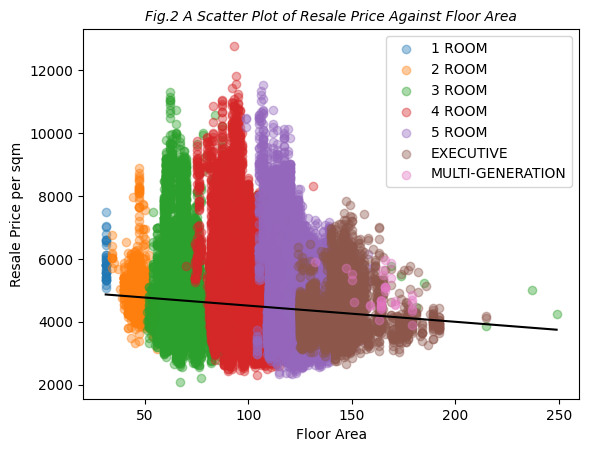

In [13]:
all_filtered = df_copy.dropna(subset=['resale_pricePersqm', 'floor_area_sqm'])

# Create a scatter plot with Matplotlib
fig, ax = plt.subplots()

# Group data by 'flat_type'
groups = all_filtered.groupby('flat_type')

# Create a scatter plot for each 'flat_type' group
for name, group in groups:
    ax.scatter(group['floor_area_sqm'], group['resale_pricePersqm'], label=name, alpha=0.4)

# Add a linear regression line to the entire dataset
slope, intercept, r_value, p_value, std_err = linregress(all_filtered['floor_area_sqm'], all_filtered['resale_pricePersqm'])
line_x = np.array([all_filtered['floor_area_sqm'].min(), all_filtered['floor_area_sqm'].max()])
line_y = slope * line_x + intercept
ax.plot(line_x, line_y, color='black')

# Customize the title, axis labels, and legend
ax.set_title('Fig.2 A Scatter Plot of Resale Price Against Floor Area', fontsize=10, style='italic')
ax.set_xlabel('Floor Area')
ax.set_ylabel('Resale Price per sqm')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# after plotting, i saw the most data points are not close to the linear line => correlation is low

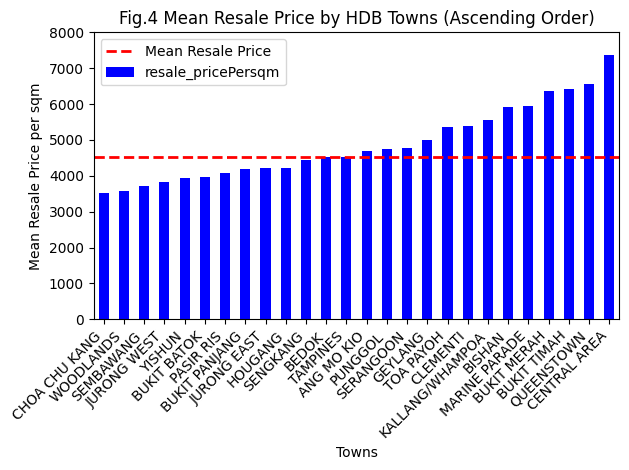

In [14]:
all_filtered = df_copy.dropna(subset=['resale_pricePersqm'])

# Calculate the mean resale price per sqm for each town
mean_resale_prices = all_filtered.groupby('town')['resale_pricePersqm'].mean()

# Sort the data in ascending order by 'resale_pricePersqm'
mean_resale_prices = mean_resale_prices.sort_values()

# Create a bar plot with Matplotlib
fig, ax = plt.subplots()

# Plot the mean resale price per sqm for each town
mean_resale_prices.plot(kind='bar', color='blue', ax=ax)

# Customize the x-axis labels
ax.set_xticklabels(mean_resale_prices.index, rotation=45, ha='right')

# Add a dashed red line for the mean
mean_value = all_filtered['resale_pricePersqm'].mean()
ax.axhline(y=mean_value, color='red', linestyle='--', label='Mean Resale Price', linewidth=2)

# Customize the y-axis ticks
ax.set_yticks(range(0, 8001, 1000))

# Set labels and title
ax.set_ylabel('Mean Resale Price per sqm')
ax.set_xlabel('Towns')
ax.set_title('Fig.4 Mean Resale Price by HDB Towns (Ascending Order)')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'remove'

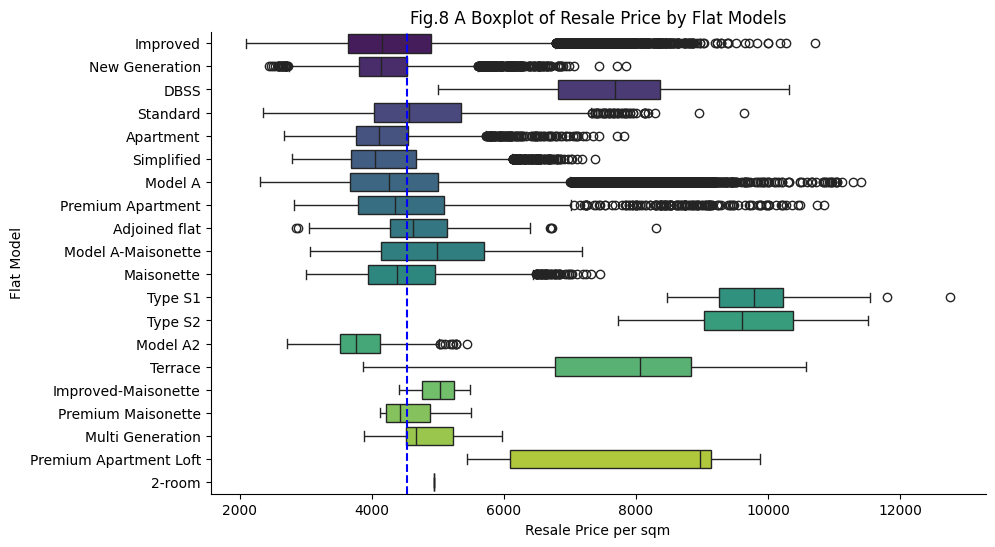

In [15]:
all_filtered = df_copy.dropna(subset=['resale_pricePersqm'])

# Create a horizontal boxplot with seaborn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=all_filtered, y='flat_model', x='resale_pricePersqm', hue='flat_model', orient='h', palette='viridis')
sns.despine()

# Add a dashed line for the mean resale price
mean_value = all_filtered['resale_pricePersqm'].mean()
plt.axvline(x=mean_value, color='blue', linestyle='--', label='Mean Resale Price')

# Customize labels and title
plt.xlabel('Resale Price per sqm')
plt.ylabel('Flat Model')
plt.title('Fig.8 A Boxplot of Resale Price by Flat Models')

# Remove the legend
ax.get_legend().remove()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\3995758053.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(mean_resale_prices.index, rotation=45, ha='right')


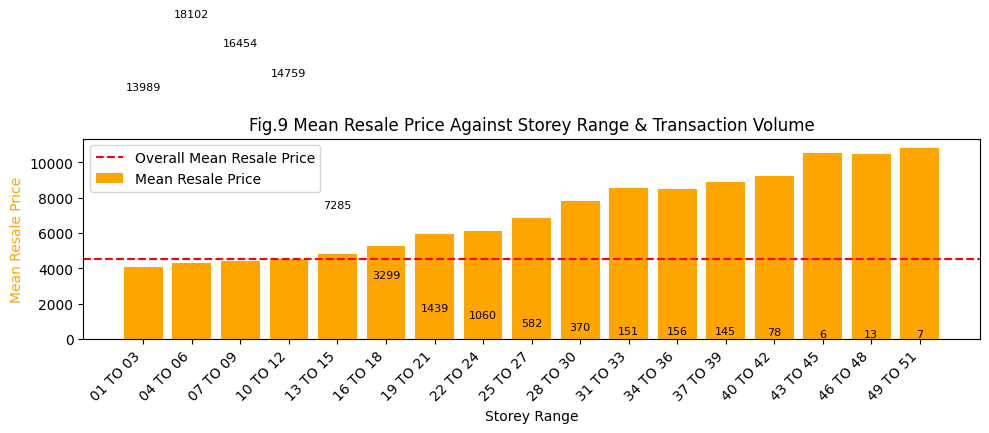

In [16]:
all_filtered = df_copy.dropna(subset=['resale_pricePersqm'])

# Group data by 'storey_range' and calculate the mean resale price
mean_resale_prices = all_filtered.groupby('storey_range')['resale_pricePersqm'].mean()

# Group data by 'storey_range' and calculate the count of observations
count_observations = all_filtered['storey_range'].value_counts().reindex(mean_resale_prices.index).fillna(0)

# Create a bar plot with Matplotlib
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the mean resale price per storey range
ax1.bar(mean_resale_prices.index, mean_resale_prices, color='orange', label='Mean Resale Price')
ax1.set_xlabel('Storey Range')
ax1.set_ylabel('Mean Resale Price', color='orange')

# Add labels showing the count of observations
for i, count in enumerate(count_observations):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

# Customize the x-axis labels
ax1.set_xticklabels(mean_resale_prices.index, rotation=45, ha='right')

# Add a dashed red line for the overall mean resale price
mean_value = all_filtered['resale_pricePersqm'].mean()
ax1.axhline(y=mean_value, color='red', linestyle='--', label='Overall Mean Resale Price')

# Set title and legend
ax1.set_title('Fig.9 Mean Resale Price Against Storey Range & Transaction Volume')
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Higher floors are also positively correlated with resale price per sqm. This is because high-storey HDBs are rare and 
# their supply limited. Majority of the flats are built not exceeding 18 storeys, as can be seen in the transaction volume 
# (white box). I will code it into a categorical variable later.

In [66]:
data_raw['month'].head(1)

0   2015-01-01
Name: month, dtype: datetime64[ns]

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\2477427343.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts_avg.index, y=monthly_counts_avg.values, palette='viridis')


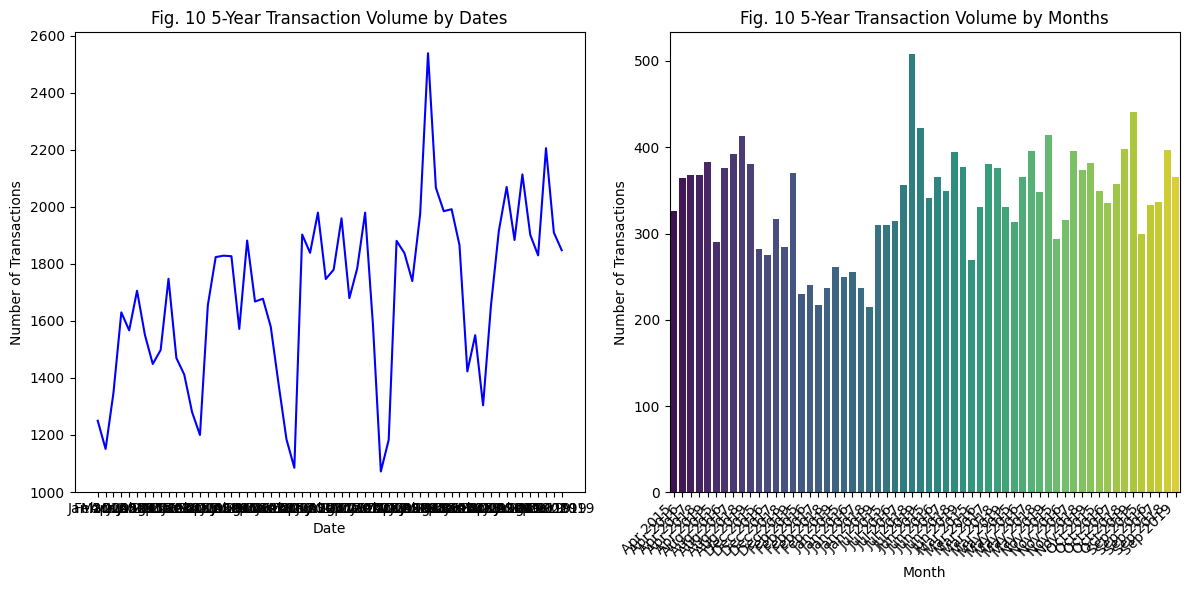

In [17]:
data_1516 = pd.read_csv("E:\\singapore\\data\\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv", dtype=str)
data_17 = pd.read_csv("E:\\singapore\\data\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv", dtype=str)

data_raw = pd.concat([data_1516, data_17], ignore_index=True)
data_raw['resale_price'] = data_raw['resale_price'].astype(float)
data_raw['floor_area_sqm'] = data_raw['floor_area_sqm'].astype(float)
data_raw['resale_pricePersqm'] = data_raw['resale_price'] / data_raw['floor_area_sqm']

# Convert the 'month' column into a Date format
data_raw['month'] = pd.to_datetime(data_raw['month'], format='%Y-%m')

# Filter data for transactions before January 2020
data_filtered = data_raw[data_raw['month'] < '2020-01-01']

# Calculate the total number of transactions per month
monthly_counts = data_filtered.groupby(data_filtered['month']).size().reset_index(name='count')

# Calculate the average number of transactions per month for the second plot
monthly_counts['month'] = monthly_counts['month'].dt.strftime('%b %Y')
monthly_counts_avg = monthly_counts.groupby('month')['count'].mean() /5

# Create two plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.lineplot(data=monthly_counts, x='month', y='count', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Fig. 10 5-Year Transaction Volume by Dates')

plt.subplot(122)
sns.barplot(x=monthly_counts_avg.index, y=monthly_counts_avg.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Fig. 10 5-Year Transaction Volume by Months')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\519647937.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2, x='month', y='resale_pricePersqm', palette='viridis')


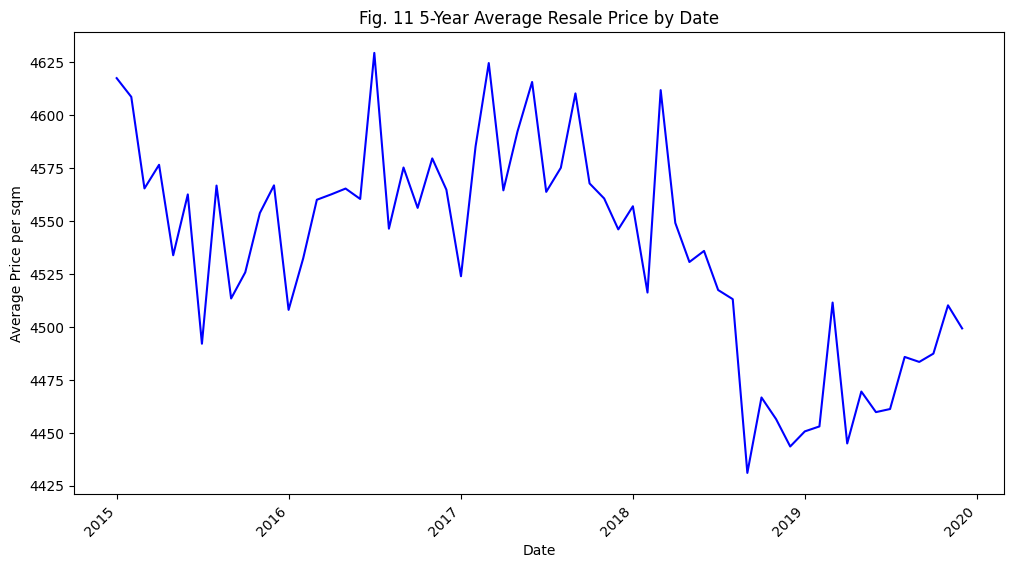

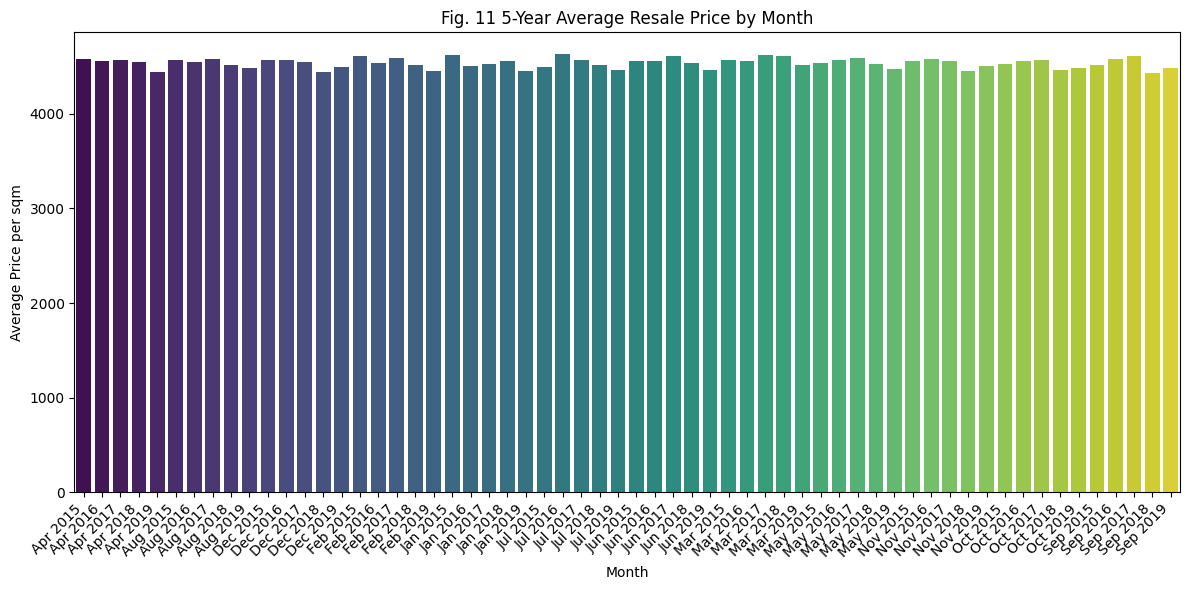

In [18]:
b1 = data_filtered.groupby('month')['resale_pricePersqm'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=b1, x='month', y='resale_pricePersqm', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Price per sqm')
plt.title('Fig. 11 5-Year Average Resale Price by Date')
plt.xticks(rotation=45, ha='right')

# Create a bar plot to show the average price per sqm by month
b2 = data_filtered.groupby([data_filtered['month'].dt.strftime('%b %Y')])['resale_pricePersqm'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=b2, x='month', y='resale_pricePersqm', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Average Price per sqm')
plt.title('Fig. 11 5-Year Average Resale Price by Month')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()





FEATURE ENGINEERING

In [19]:
geo_data = pd.read_csv('E:\\singapore\\data\\all_with_Drive_Walk_Dis.csv')

In [78]:
geo_data.head(3)

,Index,month,town,flat_type,address,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lat,long,Drive_Dis_Downtown,Walk_Dis_Mrt
0,1,2018-01,ANG MO KIO,2 ROOM,314_ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0,1.366227,103.850086,12317,462
1,2,2018-01,ANG MO KIO,3 ROOM,109_ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,59 years 07 months,240000.0,1.370097,103.837688,13458,1420
2,3,2018-01,ANG MO KIO,3 ROOM,150_ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,62 years,240000.0,1.376807,103.842018,15227,933


In [20]:
geo_copy = geo_data.copy()

In [80]:
geo_copy['distanceWithMRT'] = geo_data['Walk_Dis_Mrt']
geo_copy['distanceWithRaffles'] = geo_data['Drive_Dis_Downtown']

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sg = world[world['name'] == 'Singapore']
print(sg)

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\412403932.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Empty GeoDataFrame
Columns: [pop_est, continent, name, iso_a3, gdp_md_est, geometry]
Index: []


In [95]:
geo_data.head(1)

,Index,month,town,flat_type,address,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lat,long,Drive_Dis_Downtown,Walk_Dis_Mrt
0,1,2018-01,ANG MO KIO,2 ROOM,314_ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0,1.366227,103.850086,12317,462


C:\Users\HP\AppData\Local\Temp\ipykernel_13728\3125332917.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


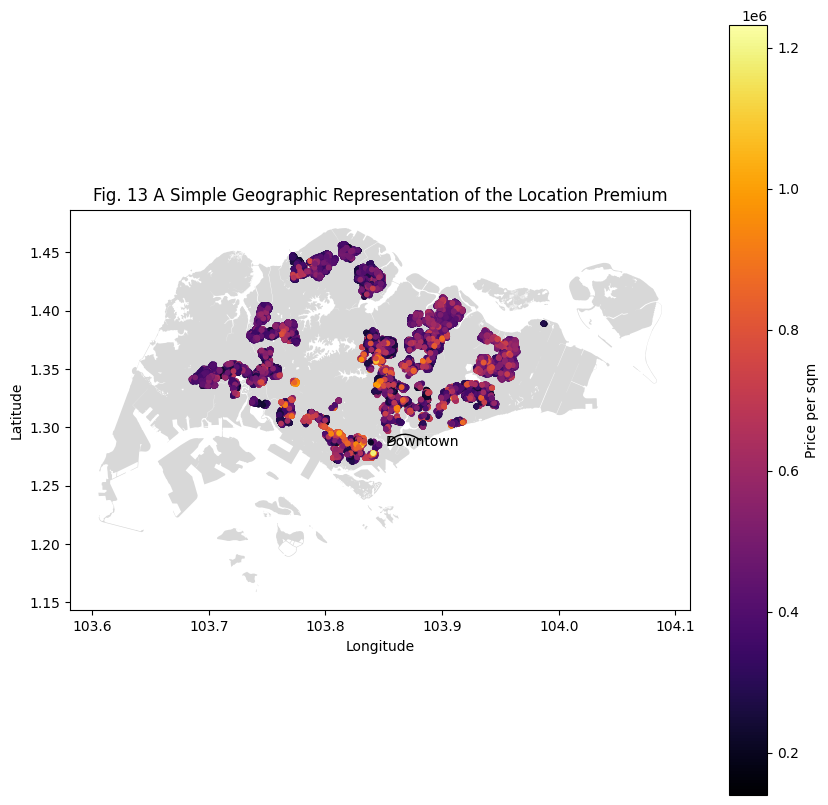

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sg = world[world['name'] == 'Singapore']

sg_gdf = gpd.read_file("E:\\singapore\\data\\singapore-boundary.geojson")

# Assuming you have the 'geodata' GeoDataFrame with 'resale_pricePersqm', 'long', and 'lat' columns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Singapore's boundaries
sg_gdf.plot(ax=ax, color='grey', alpha=0.3)

# Plot the points with color indicating 'resale_pricePersqm'
scatter = plt.scatter(geo_data['long'], geo_data['lat'], c=geo_data['resale_price'], cmap='inferno', s=10)
plt.colorbar(scatter, label='Price per sqm')

# Annotate the location "Downtown"
ax.annotate("Downtown", xy=(103.851463, 1.283933262), xytext=(103.852, 1.284), fontsize=10,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fig. 13 A Simple Geographic Representation of the Location Premium')

plt.show()

In [27]:


# Assuming you have the 'geodata' GeoDataFrame with 'resale_pricePersqm', 'long', 'lat', and 'address' columns
# Create a base map using OneMapSG tiles
m = folium.Map(location=[1.283933262, 103.851463], zoom_start=10, tiles='https://maps.onemap.sg/v3/Default/{z}/{x}/{y}.png', attr='© <a href="https://www.onemap.sg/main/v2/">OneMapSG</a> contributors')

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each location
for row in geo_data.itertuples():
    folium.Marker([row.lat, row.long], popup=row.address, icon=folium.DivIcon(html=f'<div>{round(row.resale_price)}</div>')).add_to(marker_cluster)
m.save('leaflet.html')

In [30]:
df_copy.to_csv('E:/singapore/data/copy.csv')